# Step 1: Data Loading
Import the required libraries and load the LMIA dataset (tfwp_2024q4_pos_en.csv) into a pandas DataFrame. Display the first few rows to confirm successful loading.

In [71]:
# Import required libraries
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'C:\Users\raisa\OneDrive\Desktop\Analyst Study\projects\TFWP\tfwp_2024q4_pos_en.csv', encoding='latin1')

# Display the first 5 rows
df.head()

,"Employers Who Were Issued a Positive Labour Market Impact Assessment (LMIA) by Program Stream, National Occupational Classification (NOC) 2021 and Business Location, October to December 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions
1,Newfoundland and Labrador ...,High Wage,#1Nails,"St. Johns, NL A1B 1W3","63211-Estheticians, electrologists and related...",Unknown,1,2
2,Newfoundland and Labrador ...,High Wage,Clarenville Vet Hospital Inc,"Clarenville, NL A5A 1Y9",31103-Veterinarians,Unknown,1,2
3,Newfoundland and Labrador ...,High Wage,Provincial Health Authority,"Happy Valley-Goose Bay, NL A0P 1C0",31101-Specialists in surgery,Unknown,1,1
4,Newfoundland and Labrador ...,High Wage,Young's Industrial Refrigeration,"Lethbridge, NL A0C 1V0","72402-Heating, refrigeration and air condition...",Unknown,1,1


In [72]:
# Remove the first row and set the second row as the header
# Reload the CSV, skipping the first row and using the second row as header
file_path = r'C:\Users\raisa\OneDrive\Desktop\Analyst Study\projects\TFWP\tfwp_2024q4_pos_en.csv'
df = pd.read_csv(file_path, encoding='latin1', skiprows=1)

# Display the new DataFrame header and first few rows to confirm
print(df.head())

                                  Province/Territory Program Stream  \
0  Newfoundland and Labrador                     ...      High Wage   
1  Newfoundland and Labrador                     ...      High Wage   
2  Newfoundland and Labrador                     ...      High Wage   
3  Newfoundland and Labrador                     ...      High Wage   
4  Newfoundland and Labrador                     ...       Low Wage   

                               Employer                             Address  \
0                               #1Nails              St. Johns, NL A1B 1W3   
1          Clarenville Vet Hospital Inc             Clarenville, NL A5A 1Y9   
2           Provincial Health Authority  Happy Valley-Goose Bay, NL A0P 1C0   
3      Young's Industrial Refrigeration              Lethbridge, NL A0C 1V0   
4  72764 Newfoundland and Labrador Ltd.              Springdale, NL A0J 1T0   

                                          Occupation Incorporate Status  \
0  63211-Estheticians, 

In [73]:
# 1. Handle missing values: fill with 'Unknown' for object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

In [74]:
# Display cleaned data sample
df.head()

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions
0,Newfoundland and Labrador ...,High Wage,#1Nails,"St. Johns, NL A1B 1W3","63211-Estheticians, electrologists and related...",Unknown,1.0,2.0
1,Newfoundland and Labrador ...,High Wage,Clarenville Vet Hospital Inc,"Clarenville, NL A5A 1Y9",31103-Veterinarians,Unknown,1.0,2.0
2,Newfoundland and Labrador ...,High Wage,Provincial Health Authority,"Happy Valley-Goose Bay, NL A0P 1C0",31101-Specialists in surgery,Unknown,1.0,1.0
3,Newfoundland and Labrador ...,High Wage,Young's Industrial Refrigeration,"Lethbridge, NL A0C 1V0","72402-Heating, refrigeration and air condition...",Unknown,1.0,1.0
4,Newfoundland and Labrador ...,Low Wage,72764 Newfoundland and Labrador Ltd.,"Springdale, NL A0J 1T0",62020-Food service supervisors,Unknown,1.0,1.0


In [75]:
# 2. Standardize occupation names and NOC codes (strip whitespace, uppercase NOC)
if 'NOC' in df.columns:
    df['NOC'] = df['NOC'].astype(str).str.strip().str.upper()
if 'Occupation' in df.columns:
    df['Occupation'] = df['Occupation'].str.strip().str.title()

df.head()

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions
0,Newfoundland and Labrador ...,High Wage,#1Nails,"St. Johns, NL A1B 1W3","63211-Estheticians, Electrologists And Related...",Unknown,1.0,2.0
1,Newfoundland and Labrador ...,High Wage,Clarenville Vet Hospital Inc,"Clarenville, NL A5A 1Y9",31103-Veterinarians,Unknown,1.0,2.0
2,Newfoundland and Labrador ...,High Wage,Provincial Health Authority,"Happy Valley-Goose Bay, NL A0P 1C0",31101-Specialists In Surgery,Unknown,1.0,1.0
3,Newfoundland and Labrador ...,High Wage,Young's Industrial Refrigeration,"Lethbridge, NL A0C 1V0","72402-Heating, Refrigeration And Air Condition...",Unknown,1.0,1.0
4,Newfoundland and Labrador ...,Low Wage,72764 Newfoundland and Labrador Ltd.,"Springdale, NL A0J 1T0",62020-Food Service Supervisors,Unknown,1.0,1.0


In [76]:
# 2. Standardize occupation names and NOC codes (strip whitespace, uppercase NOC)
if 'NOC' in df.columns:
    df['NOC'] = df['NOC'].astype(str).str.strip().str.upper()
if 'Occupation' in df.columns:
    df['Occupation'] = df['Occupation'].str.strip().str.title()

# 3. Normalize employer and location fields (strip whitespace, title case)
for col in ['Employer', 'Location', 'City', 'Province']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

# 4. Ensure all numeric columns are properly typed
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except Exception:
            pass

# 5. Remove duplicates
df = df.drop_duplicates()

# Display cleaned data sample
df.head()

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions
0,Newfoundland and Labrador ...,High Wage,#1Nails,"St. Johns, NL A1B 1W3","63211-Estheticians, Electrologists And Related...",Unknown,1.0,2.0
1,Newfoundland and Labrador ...,High Wage,Clarenville Vet Hospital Inc,"Clarenville, NL A5A 1Y9",31103-Veterinarians,Unknown,1.0,2.0
2,Newfoundland and Labrador ...,High Wage,Provincial Health Authority,"Happy Valley-Goose Bay, NL A0P 1C0",31101-Specialists In Surgery,Unknown,1.0,1.0
3,Newfoundland and Labrador ...,High Wage,Young'S Industrial Refrigeration,"Lethbridge, NL A0C 1V0","72402-Heating, Refrigeration And Air Condition...",Unknown,1.0,1.0
4,Newfoundland and Labrador ...,Low Wage,72764 Newfoundland And Labrador Ltd.,"Springdale, NL A0J 1T0",62020-Food Service Supervisors,Unknown,1.0,1.0


## Extract NOC Code and Occupation Name
Separate the NOC code from the occupation name in the "Occupation" column, creating two new columns: "NOC code" and "Occupation name". This helps with more precise analysis by allowing you to group and filter by either code or name.

In [77]:
# Improved extraction: separate leading digits (NOC code) from the rest (Occupation name)
import re

def extract_noc_and_occupation(val):
    if isinstance(val, str):
        match = re.match(r'^(\d+)[^\w]*(.*)$', val.strip())
        if match:
            noc_code = int(match.group(1))
            occupation_name = match.group(2).strip()
            return noc_code, occupation_name
        else:
            return None, val.strip()
    return None, None

# Extract from the correct column: 'Occupation'
df[['NOC code', 'Occupation name']] = df['Occupation'].apply(lambda x: pd.Series(extract_noc_and_occupation(x)))
df['NOC code'] = df['NOC code'].fillna(-1).astype(int)
df['Occupation name'] = df['Occupation name'].fillna('Unknown')

# Display the updated DataFrame
print(df[['NOC code', 'Occupation name']].head())

   NOC code                                    Occupation name
0     63211  Estheticians, Electrologists And Related Occup...
1     31103                                      Veterinarians
2     31101                             Specialists In Surgery
3     72402  Heating, Refrigeration And Air Conditioning Me...
4     62020                           Food Service Supervisors


In [78]:
df.head()

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,NOC code,Occupation name
0,Newfoundland and Labrador ...,High Wage,#1Nails,"St. Johns, NL A1B 1W3","63211-Estheticians, Electrologists And Related...",Unknown,1.0,2.0,63211,"Estheticians, Electrologists And Related Occup..."
1,Newfoundland and Labrador ...,High Wage,Clarenville Vet Hospital Inc,"Clarenville, NL A5A 1Y9",31103-Veterinarians,Unknown,1.0,2.0,31103,Veterinarians
2,Newfoundland and Labrador ...,High Wage,Provincial Health Authority,"Happy Valley-Goose Bay, NL A0P 1C0",31101-Specialists In Surgery,Unknown,1.0,1.0,31101,Specialists In Surgery
3,Newfoundland and Labrador ...,High Wage,Young'S Industrial Refrigeration,"Lethbridge, NL A0C 1V0","72402-Heating, Refrigeration And Air Condition...",Unknown,1.0,1.0,72402,"Heating, Refrigeration And Air Conditioning Me..."
4,Newfoundland and Labrador ...,Low Wage,72764 Newfoundland And Labrador Ltd.,"Springdale, NL A0J 1T0",62020-Food Service Supervisors,Unknown,1.0,1.0,62020,Food Service Supervisors


# Step 3: Data Exploration & Statistical Analysis
## Descriptive Statistics
Calculate and display the total number of LMIA approvals, unique positions (occupations/NOC), and unique employers. This provides a high-level overview of the dataset and helps understand the scale and diversity of LMIA activity in Newfoundland and Labrador for Q4 2024.

In [79]:
# Descriptive statistics on the cleaned and updated DataFrame

# Total LMIA approvals (number of rows)
total_approvals = len(df)

# Unique positions: count unique combinations of NOC code and Occupation name
unique_positions = df[['NOC code', 'Occupation name']].drop_duplicates().shape[0]

# Unique employers (if column exists)
unique_employers = df['Employer'].nunique() if 'Employer' in df.columns else None

print(f"Total LMIA Approvals: {total_approvals}")
print(f"Unique Positions (NOC code + Occupation name): {unique_positions}")
if unique_employers is not None:
    print(f"Unique Employers: {unique_employers}")

Total LMIA Approvals: 17753
Unique Positions (NOC code + Occupation name): 394
Unique Employers: 15001


## Top 10 NOC Codes by LMIA Approvals
Identify the top 10 NOC codes with the highest number of LMIA approvals, along with their corresponding occupation names. This helps highlight the most in-demand occupations in Newfoundland and Labrador for Q4 2024.

In [80]:
# Top NOC codes by LMIA approvals (without occupation names)
noc_counts = df.groupby('NOC code').size().reset_index(name='Approvals')
top_noc = noc_counts.sort_values(by='Approvals', ascending=False).head(10)

print("Top 10 NOC codes by LMIA approvals:")
print(top_noc)

Top 10 NOC codes by LMIA approvals:
     NOC code  Approvals
209     63200       1478
336     85101       1447
197     62020       1364
335     85100        833
233     65201        776
35      13110        732
316     75110        574
196     62010        433
304     73300        405
338     85103        350


In [81]:
# Top 10 occupations (occupation names) by LMIA approvals
occupation_counts = df.groupby('Occupation name').size().reset_index(name='Approvals')
top_occupations = occupation_counts.sort_values(by='Approvals', ascending=False).head(10)

print("Top 10 occupations by LMIA approvals:")
print(top_occupations)

Top 10 occupations by LMIA approvals:
                                       Occupation name  Approvals
78                                               Cooks       1478
148                               Harvesting Labourers       1447
132                           Food Service Supervisors       1364
198                                Livestock Labourers        833
131  Food Counter Attendants, Kitchen Helpers And R...        776
5                            Administrative Assistants        732
69           Construction Trades Helpers And Labourers        574
318                           Retail Sales Supervisors        433
377                            Transport Truck Drivers        405
236                   Nursery And Greenhouse Labourers        350


## Top Employers by LMIA Approvals
List the employers with the highest number of LMIA approvals, sorted from highest to lowest. This helps identify which organizations are leading in job creation through the LMIA process.

In [82]:
# Group by Employer and count LMIA approvals
employer_counts = df.groupby('Employer').size().reset_index(name='Approvals')
# Sort in descending order (highest to lowest)
top_employers = employer_counts.sort_values(by='Approvals', ascending=False)

print("Employers with the highest number of LMIA approvals (highest to lowest):")
print(top_employers)

Employers with the highest number of LMIA approvals (highest to lowest):
                                                Employer  Approvals
11733                     Poseidon Personnel Services Sa         36
13950                                        Tim Hortons         18
13113                Societe De Dragage International Sa          9
5199   Cgi Information Systems & Management Consultan...          9
6023                 Dredging And Maritime Management Sa          9
...                                                  ...        ...
14976                                Énergie Valero Inc.          1
15                                       0722802 Bc Ltd.          1
14                                     0714576 B.C. Ltd.          1
13                                        0712261 Bc Ltd          1
12                                     0708597 B.C. Ltd.          1

[15001 rows x 2 columns]


## LMIA Approvals by City
Visualize the number of LMIA approvals by city using a bar chart. This helps identify which cities have the highest demand for LMIA-approved positions.

### Improving Bar Chart Precision
To make the LMIA approvals by city bar chart more precise, use a smaller y-axis interval (e.g., 250 or 500), add data labels to each bar, and show the exact count for each city. This makes it easier to compare cities and see the actual values.

C:\Users\raisa\AppData\Local\Temp\ipykernel_29528\1208179551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=province_counts, y='Province/Territory', x='Approvals', palette='Blues_d', orient='h')


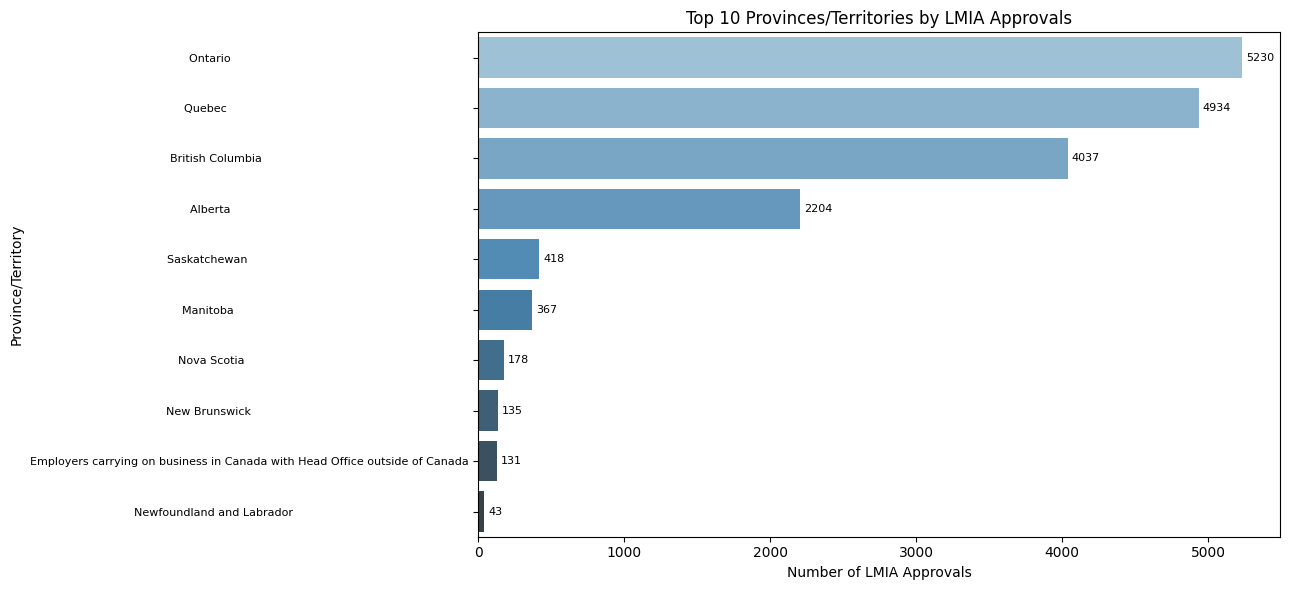

In [83]:
import matplotlib.ticker as mticker
# Horizontal bar chart for LMIA approvals by Province/Territory
plt.figure(figsize=(13, 6))
ax = sns.barplot(data=province_counts, y='Province/Territory', x='Approvals', palette='Blues_d', orient='h')
plt.title('Top 10 Provinces/Territories by LMIA Approvals')
plt.ylabel('Province/Territory')
plt.xlabel('Number of LMIA Approvals')
plt.yticks(fontsize=8)
# Set x-axis ticks to a smaller interval for more precision
ax.xaxis.set_major_locator(mticker.MultipleLocator(1000))
# Add data labels at the end of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=8, color='black', xytext=(3, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

## Stacked Bar Plot: Approved Positions and Approved LMIAs
This chart visualizes the relationship between the number of approved positions and approved LMIAs for each top occupation or NOC code. Each bar is stacked to show both metrics for easy comparison.

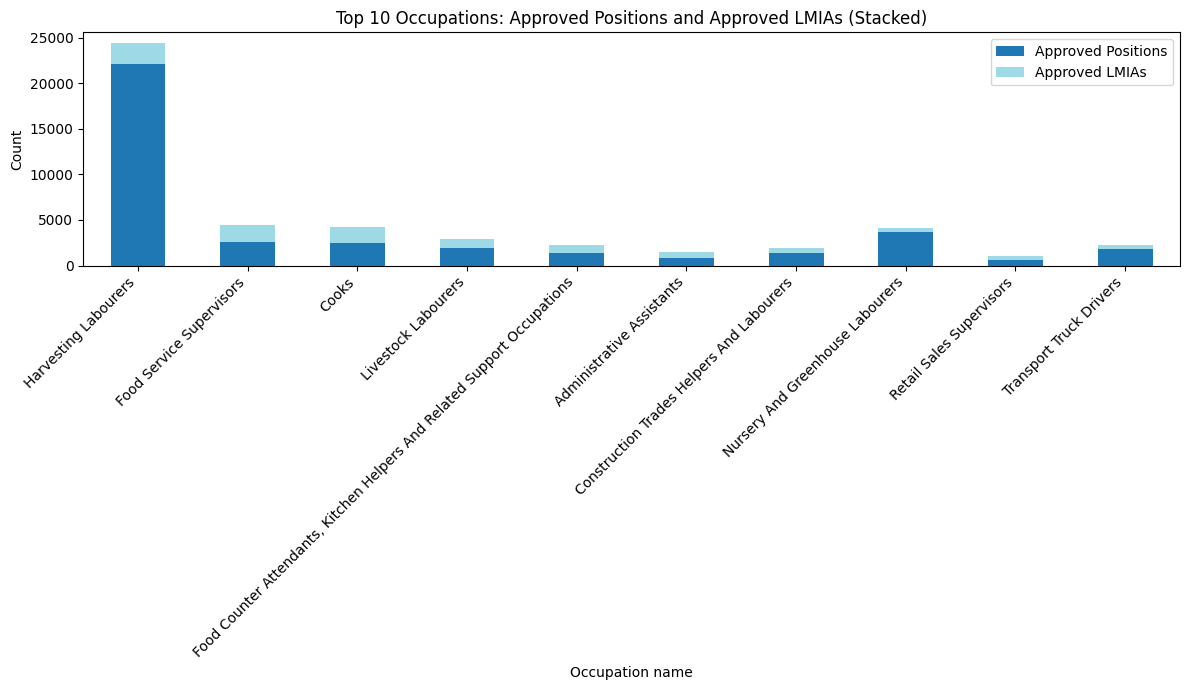

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the relevant columns exist and are numeric
if 'Approved Positions' in df.columns and 'Approved LMIAs' in df.columns:
    # Group by Occupation name or NOC code (choose one for clarity)
    group_col = 'Occupation name' if 'Occupation name' in df.columns else 'NOC code'
    summary = df.groupby(group_col)[['Approved Positions', 'Approved LMIAs']].sum().sort_values(by='Approved LMIAs', ascending=False).head(10)
    
    # Plot
    summary[['Approved Positions', 'Approved LMIAs']].plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
    plt.title('Top 10 Occupations: Approved Positions and Approved LMIAs (Stacked)')
    plt.ylabel('Count')
    plt.xlabel(group_col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print('Columns "Approved Positions" and/or "Approved LMIAs" not found in the dataset.')

In [86]:
import os
# Save the cleaned and edited DataFrame to CSV in the project folder
output_path = r'C:/Users/raisa/OneDrive/Desktop/Analyst Study/projects/lmia_cleaned_2024q4.csv'
df.to_csv(output_path, index=False)
print(f'Cleaned dataset saved to: {output_path}')

Cleaned dataset saved to: C:/Users/raisa/OneDrive/Desktop/Analyst Study/projects/lmia_cleaned_2024q4.csv
